<a href="https://colab.research.google.com/github/aanyaj04/projects/blob/main/batch%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================
# 🔹 1. IMPORTS
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

batch2_path = "/content/drive/My Drive/Batch-2"



In [ ]:
# List all MAT files
mat_files = [f for f in os.listdir(batch2_path) if f.endswith(".mat")]

print("MAT files in Batch 2:")
for f in mat_files:
    print(f)


MAT files in Batch 2:
3C_battery-1.mat
3C_battery-10.mat
3C_battery-12.mat
3C_battery-13.mat
3C_battery-11.mat
3C_battery-15.mat
3C_battery-14.mat
3C_battery-3.mat
3C_battery-2.mat
3C_battery-4.mat
3C_battery-5.mat
3C_battery-6.mat
3C_battery-7.mat
3C_battery-8.mat
3C_battery-9.mat


In [ ]:
!ls "/content/drive/My Drive"


'Aanya-Jain(1) (1).pdf'
'Aanya-Jain(1) (2).pdf'
'Aanya-Jain(1).pdf'
 Aanya-Jain-FlowCV-Resume-new.pdf
 AanyaJain_U22ME145_Resumepdf.pdf
 Assignment_4.gslides
 Batch-2
 Batch-3
'battery 1'
'Colab Notebooks'
 IMG_20250729_195949.jpg
 IMG_20250729_200138.jpg
'JEE Mains Sample Paper by Kota Faculty'
'Revision heat+kTG+thermo.pdf'
 Screenshot_2025-04-05-18-42-04-37_e5d3893ac03954c6bb675ef2555b879b.jpg
 Screenshot_2025-07-29-20-09-54-02_e2d5b3f32b79de1d45acd1fad96fbb0f.jpg
 SHEET
'SHEET (1)'
'SHEET (2)'
'SHEET (3)'


In [ ]:
# ------------------------------
# Step 0: Imports
# ------------------------------
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Folder with MAT files (Batch-2)
# ------------------------------
folder_path = "/content/drive/MyDrive/Batch-2/"  # <-- change if needed
mat_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".mat")]
mat_files.sort()

all_features = []
all_SOH = []

print("Found MAT files:", mat_files)

# ------------------------------
# Step 2: Feature extraction for each battery file
# ------------------------------
for f in mat_files:
    print("Processing:", f)

    mat = loadmat(f)

    # Access struct fields safely
    data = mat['data'][0]          # each index = one cycle
    summary = mat['summary'][0][0]

    capacities = summary['Qc'].reshape(-1) if 'Qc' in summary.dtype.names else summary[0].resha


Found MAT files: ['/content/drive/MyDrive/Batch-2/3C_battery-1.mat', '/content/drive/MyDrive/Batch-2/3C_battery-10.mat', '/content/drive/MyDrive/Batch-2/3C_battery-11.mat', '/content/drive/MyDrive/Batch-2/3C_battery-12.mat', '/content/drive/MyDrive/Batch-2/3C_battery-13.mat', '/content/drive/MyDrive/Batch-2/3C_battery-14.mat', '/content/drive/MyDrive/Batch-2/3C_battery-15.mat', '/content/drive/MyDrive/Batch-2/3C_battery-2.mat', '/content/drive/MyDrive/Batch-2/3C_battery-3.mat', '/content/drive/MyDrive/Batch-2/3C_battery-4.mat', '/content/drive/MyDrive/Batch-2/3C_battery-5.mat', '/content/drive/MyDrive/Batch-2/3C_battery-6.mat', '/content/drive/MyDrive/Batch-2/3C_battery-7.mat', '/content/drive/MyDrive/Batch-2/3C_battery-8.mat', '/content/drive/MyDrive/Batch-2/3C_battery-9.mat']
Processing: /content/drive/MyDrive/Batch-2/3C_battery-1.mat


AttributeError: 'numpy.ndarray' object has no attribute 'resha'

In [ ]:
mat = loadmat("/content/drive/MyDrive/Batch-2/3C_battery-1.mat")
summary = mat["summary"][0][0]

print("Summary fields:", summary.dtype.names)


Summary fields: ('charge_capacity_Ah', 'discharge_capacity_Ah', 'charge_power_Wh', 'discharge_power_Wh', 'charge_median_voltage', 'discharge_median_voltage', 'charge_mean_voltage', 'discharge_mean_voltage', 'cycle_life', 'description')


In [ ]:
import scipy.io
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Path to Batch-2 folder
batch2_path = "/content/drive/MyDrive/Batch-2"

# List MAT files
mat_files = [os.path.join(batch2_path, f) for f in os.listdir(batch2_path) if f.endswith(".mat")]
print("Found MAT files:", mat_files)

all_features = []
all_soh = []

for file in mat_files:
    print("Processing:", file)

    mat = scipy.io.loadmat(file)
    summary = mat["summary"][0][0]

    # Extract features safely
    discharge_cap = summary["discharge_capacity_Ah"].reshape(-1)
    charge_cap = summary["charge_capacity_Ah"].reshape(-1)
    discharge_mean_v = summary["discharge_mean_voltage"].reshape(-1)
    charge_mean_v = summary["charge_mean_voltage"].reshape(-1)

    # Build feature matrix
    features = np.column_stack([
        discharge_cap,
        charge_cap,
        discharge_mean_v,
        charge_mean_v
    ])

    # SOH = discharge_capacity / initial discharge_capacity
    soh = discharge_cap / discharge_cap[0]

    all_features.append(features)
    all_soh.append(soh)

# Convert to numpy
X = np.vstack(all_features)
y = np.hstack(all_soh)

print("Final X shape:", X.shape)
print("Final y shape:", y.shape)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True)

# ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Test Loss
loss = model.evaluate(X_test, y_test)
print("Test MSE:", loss)


Found MAT files: ['/content/drive/MyDrive/Batch-2/3C_battery-1.mat', '/content/drive/MyDrive/Batch-2/3C_battery-10.mat', '/content/drive/MyDrive/Batch-2/3C_battery-12.mat', '/content/drive/MyDrive/Batch-2/3C_battery-13.mat', '/content/drive/MyDrive/Batch-2/3C_battery-11.mat', '/content/drive/MyDrive/Batch-2/3C_battery-15.mat', '/content/drive/MyDrive/Batch-2/3C_battery-14.mat', '/content/drive/MyDrive/Batch-2/3C_battery-3.mat', '/content/drive/MyDrive/Batch-2/3C_battery-2.mat', '/content/drive/MyDrive/Batch-2/3C_battery-4.mat', '/content/drive/MyDrive/Batch-2/3C_battery-5.mat', '/content/drive/MyDrive/Batch-2/3C_battery-6.mat', '/content/drive/MyDrive/Batch-2/3C_battery-7.mat', '/content/drive/MyDrive/Batch-2/3C_battery-8.mat', '/content/drive/MyDrive/Batch-2/3C_battery-9.mat']
Processing: /content/drive/MyDrive/Batch-2/3C_battery-1.mat
Processing: /content/drive/MyDrive/Batch-2/3C_battery-10.mat
Processing: /content/drive/MyDrive/Batch-2/3C_battery-12.mat
Processing: /content/drive/My

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3593 - val_loss: 0.0389
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 - val_loss: 0.0042
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 8.4453e-04
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2147e-04 - val_loss: 5.8521e-04
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3437e-04 - val_loss: 4.2054e-04
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0817e-04 - val_loss: 3.1603e-04
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7474e-04 - val_loss: 2.7150e-04
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1849e-04 - val_loss: 2.5145e-04
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0823e-04 - val_loss: 2.2769e-04
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8216e-04 - val_loss: 2.1944e-04
Epoch 12/50
85

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using trained model
y_pred = model.predict(X_test).reshape(-1)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--------------------------------------------------")
print("Batch-2 SOH Prediction Performance")
print("MSE :", mse)
print("R²  :", r2)
print("--------------------------------------------------")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
--------------------------------------------------
Batch-2 SOH Prediction Performance
MSE : 0.00013359608790910262
R²  : 0.9341899108570669
--------------------------------------------------


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("\n================ BATTERY FILE-WISE PERFORMANCE ================\n")

for idx, file in enumerate(mat_files):
    print(f"Battery File: {os.path.basename(file)}")

    # Reload the same MAT file
    mat = scipy.io.loadmat(file)
    summary = mat["summary"][0][0]

    # Extract features
    discharge_cap = summary["discharge_capacity_Ah"].reshape(-1)
    charge_cap = summary["charge_capacity_Ah"].reshape(-1)
    discharge_mean_v = summary["discharge_mean_voltage"].reshape(-1)
    charge_mean_v = summary["charge_mean_voltage"].reshape(-1)

    features = np.column_stack([
        discharge_cap,
        charge_cap,
        discharge_mean_v,
        charge_mean_v
    ])

    # True SOH
    soh_true = discharge_cap / discharge_cap[0]

    # Scale features using the scaler trained earlier
    X_scaled_file = scaler.transform(features)

    # Predict SOH
    soh_pred = model.predict(X_scaled_file).reshape(-1)

    # Performance
    mse = mean_squared_error(soh_true, soh_pred)
    r2 = r2_score(soh_true, soh_pred)

    print(f"  MSE : {mse}")
    print(f"  R²  : {r2}")
    print("--------------------------------------------------")



================ BATTERY FILE-WISE PERFORMANCE ================

Battery File: 3C_battery-1.mat
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
  MSE : 5.92089623654691e-05
  R²  : 0.970432663600184
--------------------------------------------------
Battery File: 3C_battery-10.mat
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  MSE : 0.00025836698288472283
  R²  : 0.8413214002272559
--------------------------------------------------
Battery File: 3C_battery-12.mat
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
  MSE : 0.00011112337379169024
  R²  : 0.9290016481845365
--------------------------------------------------
Battery File: 3C_battery-13.mat
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  MSE : 0.00013074789724588275
  R²  : 0.9254517668345426
--------------------------------------------------
Battery File: 3C_battery-11.mat
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  MSE : 0.0001246796858714995
  R²  : 0.9199623149967813
--------------------------------------------------
Battery File: 3C_battery-15.mat
6/6 ━━━━━━

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Predict using trained model
y_pred = model.predict(X_test).reshape(-1)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MAE  :", mae)
print("MAPE :", mape, "%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MAE  : 0.047999757127749884
MAPE : 5.229836022377487 %


In [ ]:
# reshape for sequence models (LSTM / GRU / CNN)
X_train_seq = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_seq = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Sequence input shape:", X_train_seq.shape)


Sequence input shape: (2993, 4, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

lstm_model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train_seq.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm = lstm_model.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_lstm = lstm_model.predict(X_test_seq).flatten()

print("LSTM MSE:", mean_squared_error(y_test, y_pred_lstm))
print("LSTM R2:", r2_score(y_test, y_pred_lstm))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.5139 - val_loss: 0.0042
Epoch 2/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 3.1392e-04
Epoch 3/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1728e-04 - val_loss: 2.8670e-04
Epoch 4/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7151e-04 - val_loss: 2.6232e-04
Epoch 5/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7438e-04 - val_loss: 2.5334e-04
Epoch 6/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4796e-04 - val_loss: 2.4582e-04
Epoch 7/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4773e-04 - val_loss: 2.3755e-04
Epoch 8/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3035e-04 - val_loss: 2.3503e-04
Epoch 9/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2966e-04 - val_loss: 2.1373e-04
Epoch 10/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1666e-04 - val_loss: 2.2138e-04
Epoch 11/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1566e-04 - val_loss

In [ ]:
# ============================================================
# BATTERY-WISE METRICS FOR LSTM
# ============================================================

from sklearn.metrics import mean_squared_error, r2_score

print("\n================ LSTM Battery-wise Results ================\n")

battery_index = 0
start = 0

for features, soh in zip(all_features, all_soh):

    n = len(soh)
    end = start + n

    # Extract the same portion used by ANN code
    X_b = X_scaled[start:end]
    y_b = y[start:end]

    # Reshape for LSTM model
    X_b_seq = X_b.reshape((X_b.shape[0], X_b.shape[1], 1))

    # Predict
    y_pred_b = lstm_model.predict(X_b_seq).flatten()

    # Metrics
    mse_b = mean_squared_error(y_b, y_pred_b)
    r2_b = r2_score(y_b, y_pred_b)

    print(f"Battery {battery_index+1}:")
    print("  MSE =", mse_b)
    print("  R²  =", r2_b)
    print("----------------------------------------------------")

    start = end
    battery_index += 1



================ LSTM Battery-wise Results ================

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Battery 1:
  MSE = 1.5825649399486346e-05
  R²  = 0.9920971035322002
----------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Battery 2:
  MSE = 0.00021623650834656528
  R²  = 0.8671962416363026
----------------------------------------------------
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Battery 3:
  MSE = 0.00027686954045404123
  R²  = 0.8231039936117228
----------------------------------------------------
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Battery 4:
  MSE = 0.00021623559774055633
  R²  = 0.8767094377914161
----------------------------------------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Battery 5:
  MSE = 0.00010612221485497371
  R²  = 0.9318752181236616
----------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Battery 6:
  MSE = 0.00021912408031025165
  R²  = 0.8626832325425738
-----------------------------

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Predictions
y_pred_lstm = lstm_model.predict(X_test_seq).flatten()

# Existing metrics
print("LSTM MSE:", mean_squared_error(y_test, y_pred_lstm))
print("LSTM R2:", r2_score(y_test, y_pred_lstm))

# Additional metrics
mae = mean_absolute_error(y_test, y_pred_lstm)
mape = np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100

print("LSTM MAE :", mae)
print("LSTM MAPE:", mape, "%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ValueError: Found input variables with inconsistent numbers of samples: [749, 739]

In [ ]:
#not proper

In [ ]:
y_test_seq = y_test[-len(y_pred_lstm):]  # take last part that matches prediction length

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


mae = mean_absolute_error(y_test_seq, y_pred_lstm)
mape = np.mean(np.abs((y_test_seq - y_pred_lstm) / y_test_seq)) * 100


print("LSTM MAE :", mae)
print("LSTM MAPE:", mape, "%")


LSTM MAE : 2.267714456095412
LSTM MAPE: 241.97759180858105 %


In [ ]:
smape = 100 * np.mean(2 * np.abs(y_test_seq - y_pred_lstm) / (np.abs(y_test_seq) + np.abs(y_pred_lstm)))
print("LSTM SMAPE:", smape, "%")


LSTM SMAPE: 109.33978276828388 %


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Ensure predictions and y_test have the same length
min_len = min(len(y_test), len(y_pred_lstm))
y_test_eval = y_test[:min_len]
y_pred_eval = y_pred_lstm[:min_len]

# ------------------------------
# Compute MAE
# ------------------------------
mae = mean_absolute_error(y_test_eval, y_pred_eval)
print("LSTM MAE  :", mae)

# ------------------------------
# Compute Safe MAPE
# ------------------------------
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_idx = y_true != 0
    return np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100

mape = safe_mape(y_test_eval, y_pred_eval)
print("LSTM MAPE :", mape, "%")


LSTM MAE  : 2.265872129948903
LSTM MAPE : 241.24812398140688 %


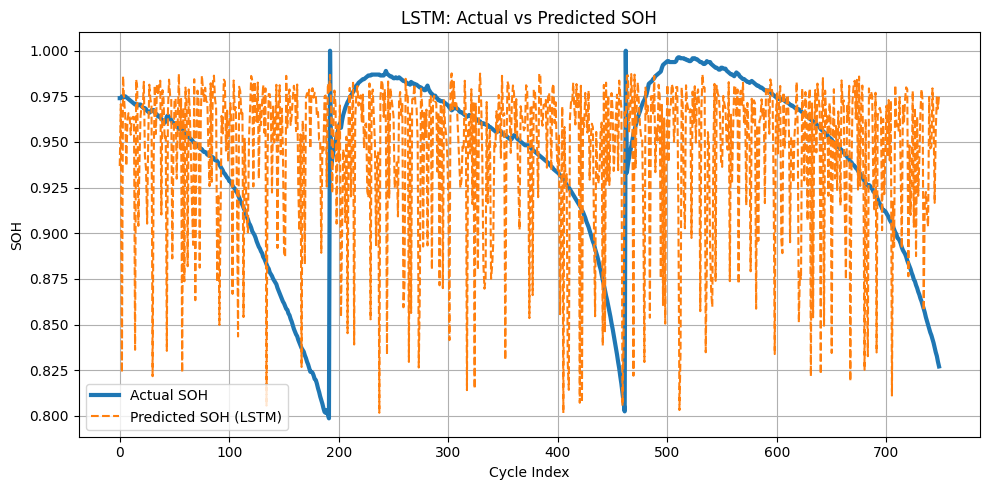

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(y_test, label="Actual SOH", linewidth=3)
plt.plot(y_pred_lstm, label="Predicted SOH (LSTM)", linestyle='dashed')

plt.title("LSTM: Actual vs Predicted SOH")
plt.xlabel("Cycle Index")
plt.ylabel("SOH")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


gru model


In [ ]:
files = [os.path.join("/content/drive/MyDrive/Batch-2", f) for f in os.listdir("/content/drive/MyDrive/Batch-2") if f.endswith(".mat")]


In [ ]:
import numpy as np
import scipy.io
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# ==================================================================
# 1. LOAD ALL MAT FILES FROM Batch-2
# ==================================================================
folder = "/content/drive/MyDrive/Batch-2"

files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".mat")]
print("Found MAT files:", files)

X = []
Y = []

# ==================================================================
# 2. EXTRACT FEATURES + SOH
# ==================================================================
for f in files:
    mat = scipy.io.loadmat(f)
    summary = mat["summary"][0][0]

    discharge_capacity = summary["discharge_capacity_Ah"].reshape(-1)
    cycle_life = summary["cycle_life"].reshape(-1)

    soh = discharge_capacity / discharge_capacity[0]   # Normalize SOH

    # Features (example: discharge capacity + median voltage)
    feat1 = summary["discharge_capacity_Ah"].reshape(-1)
    feat2 = summary["discharge_median_voltage"].reshape(-1)

    # Stack features
    features = np.column_stack([feat1, feat2])

    X.append(features)
    Y.append(soh)

# Convert list to array
X = np.vstack(X)
Y = np.hstack(Y)

print("X shape:", X.shape)
print("Y shape:", Y.shape)

# ==================================================================
# 3. SCALE FEATURES
# ==================================================================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ==================================================================
# 4. SPLIT TRAIN–TEST
# ==================================================================
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.2, shuffle=False
)

# ==================================================================
# 5. RESHAPE FOR GRU
# ==================================================================
X_train_gru = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_gru  = X_test_scaled.reshape(X_test_scaled.shape[0],  X_test_scaled.shape[1],  1)

# ==================================================================
# 6. BUILD GRU MODEL
# ==================================================================
model_gru = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train_gru.shape[1], 1)),
    GRU(32),
    Dense(16, activation='relu'),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')

# ==================================================================
# 7. TRAIN GRU
# ==================================================================
history = model_gru.fit(
    X_train_gru, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# ==================================================================
# 8. PREDICT & EVALUATE
# ==================================================================
y_pred = model_gru.predict(X_test_gru)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("--------------------------------------------------")
print("Batch-2 GRU SOH Prediction Performance")
print("MSE :", mse)
print("R²  :", r2)
print("--------------------------------------------------")


Found MAT files: ['/content/drive/MyDrive/Batch-2/3C_battery-1.mat', '/content/drive/MyDrive/Batch-2/3C_battery-10.mat', '/content/drive/MyDrive/Batch-2/3C_battery-12.mat', '/content/drive/MyDrive/Batch-2/3C_battery-13.mat', '/content/drive/MyDrive/Batch-2/3C_battery-11.mat', '/content/drive/MyDrive/Batch-2/3C_battery-15.mat', '/content/drive/MyDrive/Batch-2/3C_battery-14.mat', '/content/drive/MyDrive/Batch-2/3C_battery-3.mat', '/content/drive/MyDrive/Batch-2/3C_battery-2.mat', '/content/drive/MyDrive/Batch-2/3C_battery-4.mat', '/content/drive/MyDrive/Batch-2/3C_battery-5.mat', '/content/drive/MyDrive/Batch-2/3C_battery-6.mat', '/content/drive/MyDrive/Batch-2/3C_battery-7.mat', '/content/drive/MyDrive/Batch-2/3C_battery-8.mat', '/content/drive/MyDrive/Batch-2/3C_battery-9.mat']
X shape: (3742, 2)
Y shape: (3742,)
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.2894 - val_loss: 0.0071
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.9348e-04 - val_loss: 4.4713e-04
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7936e-04 - val_loss: 1.7118e-04
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7922e-04 - val_loss: 1.0454e-04
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3605e-04 - val_loss: 7.3711e-05
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3987e-04 - val_loss: 1.0810e-04
Epoch 9/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4134e-04 - val_loss: 9.9302e-05
Epoch 10/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4363e-04 - val_loss: 5.5154e-05
Epoch 11/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3273e-04 - val_loss: 5.6845e-05
Epoch 12/30
85/85 ━━

In [ ]:
# ============================================================
# BATTERY-WISE METRICS FOR GRU
# ============================================================

print("\n================ GRU Battery-wise Results ================\n")

battery_index = 0
start = 0

for f in files:

    mat = scipy.io.loadmat(f)
    summary = mat["summary"][0][0]

    # Rebuild SAME FEATURES used for GRU model
    feat1 = summary["discharge_capacity_Ah"].reshape(-1)
    feat2 = summary["discharge_median_voltage"].reshape(-1)

    features_b = np.column_stack([feat1, feat2])
    soh_b = feat1 / feat1[0]

    # Scale using SAME scaler as training
    X_b_scaled = scaler.transform(features_b)

    # Reshape for GRU
    X_b_seq = X_b_scaled.reshape((X_b_scaled.shape[0], X_b_scaled.shape[1], 1))

    # Predict
    y_pred_b = model_gru.predict(X_b_seq).flatten()

    # Metrics
    mse_b = mean_squared_error(soh_b, y_pred_b)
    r2_b = r2_score(soh_b, y_pred_b)

    print(f"Battery {battery_index+1}:")
    print("  MSE =", mse_b)
    print("  R²  =", r2_b)
    print("----------------------------------------------------")

    battery_index += 1



================ GRU Battery-wise Results ================

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Battery 1:
  MSE = 1.204067480338166e-05
  R²  = 0.9939872163238584
----------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Battery 2:
  MSE = 0.00011929256716659273
  R²  = 0.9267353076235104
----------------------------------------------------
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Battery 3:
  MSE = 0.000509428158277922
  R²  = 0.6745188849834557
----------------------------------------------------
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Battery 4:
  MSE = 0.0003586866149381058
  R²  = 0.7954884631647369
----------------------------------------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Battery 5:
  MSE = 0.00033285419200796784
  R²  = 0.7863254243406426
----------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Battery 6:
  MSE = 0.000517755206739942
  R²  = 0.6755424085608632
------------------------------------

In [ ]:
from sklearn.metrics import mean_absolute_error

# Flatten arrays to avoid shape issues
y_test_flat = np.array(y_test).flatten()
y_pred_flat = np.array(y_pred).flatten()

# Mean Squared Error & R²
mse = mean_squared_error(y_test_flat, y_pred_flat)
r2  = r2_score(y_test_flat, y_pred_flat)

# Mean Absolute Error
mae = mean_absolute_error(y_test_flat, y_pred_flat)

# Safe MAPE (ignoring zeros)
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()
    non_zero_idx = y_true != 0
    return np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100

mape = safe_mape(y_test_flat, y_pred_flat)

print("--------------------------------------------------")
print("Batch-2 GRU SOH Prediction Performance")
print("MSE  :", mse)
print("R²   :", r2)
print("MAE  :", mae)
print("MAPE :", mape, "%")
print("--------------------------------------------------")


--------------------------------------------------
Batch-2 GRU SOH Prediction Performance
MSE  : 0.00023852512727262016
R²   : 0.8952110274868462
MAE  : 0.0126033644235217
MAPE : 1.3372230438562895 %
--------------------------------------------------


In [ ]:
import scipy.io
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# ------------------------------------------------------------
# LOAD all MAT files from Batch-2
# ------------------------------------------------------------
folder = "/content/drive/MyDrive/Batch-2"
files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".mat")]
print("Found MAT files:", files)

all_features = []
all_soh = []

for file in files:
    mat = scipy.io.loadmat(file)
    summary = mat["summary"][0][0]

    discharge_cap = summary["discharge_capacity_Ah"].reshape(-1)
    charge_cap = summary["charge_capacity_Ah"].reshape(-1)
    discharge_mean_v = summary["discharge_mean_voltage"].reshape(-1)
    charge_mean_v = summary["charge_mean_voltage"].reshape(-1)

    features = np.column_stack([
        discharge_cap,
        charge_cap,
        discharge_mean_v,
        charge_mean_v
    ])

    soh = discharge_cap / discharge_cap[0]

    all_features.append(features)
    all_soh.append(soh)

X = np.vstack(all_features)
y = np.hstack(all_soh)

print("X shape:", X.shape)
print("y shape:", y.shape)

# ------------------------------------------------------------
# SCALING
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------
# TRAIN/TEST SPLIT
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=True
)

# ------------------------------------------------------------
# RESHAPE for CNN (samples, timesteps, 1)
# timesteps = number of features = 4
# ------------------------------------------------------------
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("CNN Input Shape:", X_train_cnn.shape)

# ------------------------------------------------------------
# BUILD CNN MODEL
# ------------------------------------------------------------
cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')

# ------------------------------------------------------------
# TRAIN CNN
# ------------------------------------------------------------
history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# ------------------------------------------------------------
# EVALUATE CNN
# ------------------------------------------------------------
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()

print("CNN MSE:", mean_squared_error(y_test, y_pred_cnn))
print("CNN R2 :", r2_score(y_test, y_pred_cnn))


Found MAT files: ['/content/drive/MyDrive/Batch-2/3C_battery-1.mat', '/content/drive/MyDrive/Batch-2/3C_battery-10.mat', '/content/drive/MyDrive/Batch-2/3C_battery-12.mat', '/content/drive/MyDrive/Batch-2/3C_battery-13.mat', '/content/drive/MyDrive/Batch-2/3C_battery-11.mat', '/content/drive/MyDrive/Batch-2/3C_battery-15.mat', '/content/drive/MyDrive/Batch-2/3C_battery-14.mat', '/content/drive/MyDrive/Batch-2/3C_battery-3.mat', '/content/drive/MyDrive/Batch-2/3C_battery-2.mat', '/content/drive/MyDrive/Batch-2/3C_battery-4.mat', '/content/drive/MyDrive/Batch-2/3C_battery-5.mat', '/content/drive/MyDrive/Batch-2/3C_battery-6.mat', '/content/drive/MyDrive/Batch-2/3C_battery-7.mat', '/content/drive/MyDrive/Batch-2/3C_battery-8.mat', '/content/drive/MyDrive/Batch-2/3C_battery-9.mat']
X shape: (3742, 4)
y shape: (3742,)
CNN Input Shape: (2993, 4, 1)
Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3841 - val_loss: 0.0433
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0301 - val_loss: 0.0067
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 5/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 9.2403e-04
Epoch 6/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7399e-04 - val_loss: 6.6217e-04
Epoch 7/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0212e-04 - val_loss: 4.8762e-04
Epoch 8/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6582e-04 - val_loss: 4.0478e-04
Epoch 9/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9157e-04 - val_loss: 3.6911e-04
Epoch 10/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5255e-04 - val_loss: 3.8190e-04
Epoch 11/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2438e-04 - val_loss: 3.0859e-04
Epoch 12/40
85/85 ━━━━━━━━━━━━━━━

In [ ]:
print("\n================ CNN Battery-wise Results ================\n")

start = 0
for f in files:

    mat = scipy.io.loadmat(f)
    summary = mat["summary"][0][0]

    discharge_cap = summary["discharge_capacity_Ah"].reshape(-1)
    charge_cap = summary["charge_capacity_Ah"].reshape(-1)
    discharge_mean_v = summary["discharge_mean_voltage"].reshape(-1)
    charge_mean_v = summary["charge_mean_voltage"].reshape(-1)

    feats = np.column_stack([
        discharge_cap,
        charge_cap,
        discharge_mean_v,
        charge_mean_v
    ])

    soh = discharge_cap / discharge_cap[0]

    # Scale using SAME scaler as global model
    feats_scaled = scaler.transform(feats)

    # CNN reshape
    feats_cnn = feats_scaled.reshape(feats_scaled.shape[0], feats_scaled.shape[1], 1)

    # Predict
    pred = cnn_model.predict(feats_cnn).flatten()

    # Metrics
    mse_b = mean_squared_error(soh, pred)
    r2_b  = r2_score(soh, pred)

    print(f"Battery: {os.path.basename(f)}")
    print("  MSE :", mse_b)
    print("  R2  :", r2_b)
    print("------------------------------------------------------")



================ CNN Battery-wise Results ================

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Battery: 3C_battery-1.mat
  MSE : 7.271644304183996e-05
  R2  : 0.9636873971892126
------------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Battery: 3C_battery-10.mat
  MSE : 0.0003976932416902134
  R2  : 0.7557528209452262
------------------------------------------------------
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Battery: 3C_battery-12.mat
  MSE : 0.00026679901136928346
  R2  : 0.8295382022082671
------------------------------------------------------
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Battery: 3C_battery-13.mat
  MSE : 0.00011732234272004806
  R2  : 0.9331065849253093
------------------------------------------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Battery: 3C_battery-11.mat
  MSE : 9.389043447772235e-05
  R2  : 0.9397273664349111
------------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Battery: 3C_b